<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRUu8l8Do-N-pMTr-qkg-s6X8utpgDGG0IGwQ&usqp=CAU"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Diabetes Analysis

In this file we'll be analyzing Diabetes information for female.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Reading data:

In [47]:
pd.read_excel

<function pandas.io.excel._base.read_excel(io, sheet_name: 'str | int | list[IntStrT] | None' = 0, *, header: 'int | Sequence[int] | None' = 0, names: 'list[str] | None' = None, index_col: 'int | Sequence[int] | None' = None, usecols: 'int | str | Sequence[int] | Sequence[str] | Callable[[str], bool] | None' = None, dtype: 'DtypeArg | None' = None, engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None, converters: 'dict[str, Callable] | dict[int, Callable] | None' = None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, parse_dates: 'list | dict | bool' = False, date_parser: 'Callable | lib.NoDefault' = <no_default>, date_format: 'dict[Hashable, str] | str | None' = None, thousands: 'str | None' = None, decimal: 'str' = '.', 

In [46]:
df = pd.read_excel('E:\MeriSkillInternship\Project 2 - Diabetes Data\diabetes_python.xlsx')

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategories,Exist Cases,Cases_Num,Pregnancies_per_Age,Calculated_Insulin
0,6,148,72,35,0,33.6,0.627,50,old,Yes,1,0.120000,0.000
1,1,85,66,29,0,26.6,0.351,31,Middle Age,No,0,0.032258,0.000
2,8,183,64,0,0,23.3,0.672,32,Middle Age,Yes,1,0.250000,0.000
3,1,89,66,23,94,28.1,0.167,21,Adolescent,No,0,0.047619,15.698
4,0,137,40,35,168,43.1,2.288,33,Middle Age,Yes,1,0.000000,384.384


In [48]:
df.shape

(768, 11)

In [49]:
df.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategories,Exist Cases,Cases_Num
765,5,121,72,23,112,26.2,0.245,30,Adolescent,No,0
766,1,126,60,0,0,30.1,0.349,47,Middle Age,Yes,1
767,1,93,70,31,0,30.4,0.315,23,Adolescent,No,0


In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategories,Exist Cases,Cases_Num
0,6,148,72,35,0,33.6,0.627,50,old,Yes,1
1,1,85,66,29,0,26.6,0.351,31,Middle Age,No,0
2,8,183,64,0,0,23.3,0.672,32,Middle Age,Yes,1
3,1,89,66,23,94,28.1,0.167,21,Adolescent,No,0
4,0,137,40,35,168,43.1,2.288,33,Middle Age,Yes,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   AgeCategories             768 non-null    object 
 9   Exist Cases               768 non-null    object 
 10  Cases_Num                 768 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 66.1+ KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cases_Num
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeCategories',
       'Exist Cases', 'Cases_Num'],
      dtype='object')

### Check Null Values

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
AgeCategories               0
Exist Cases                 0
Cases_Num                   0
dtype: int64

### Check Duplicate Values

In [16]:
df.duplicated().sum()

0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization
We'll analyze the `Glucose` column:

In [17]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [18]:
df['Glucose'].mean()

120.89453125

In [19]:
df['Glucose'].median()

117.0

<Axes: >

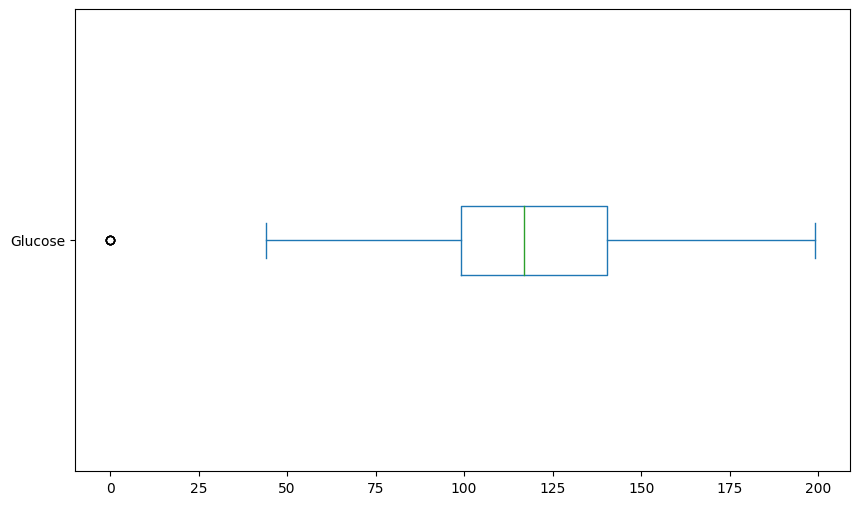

In [20]:
df['Glucose'].plot(kind='box', vert=False, figsize=(10,6))

<Axes: ylabel='Density'>

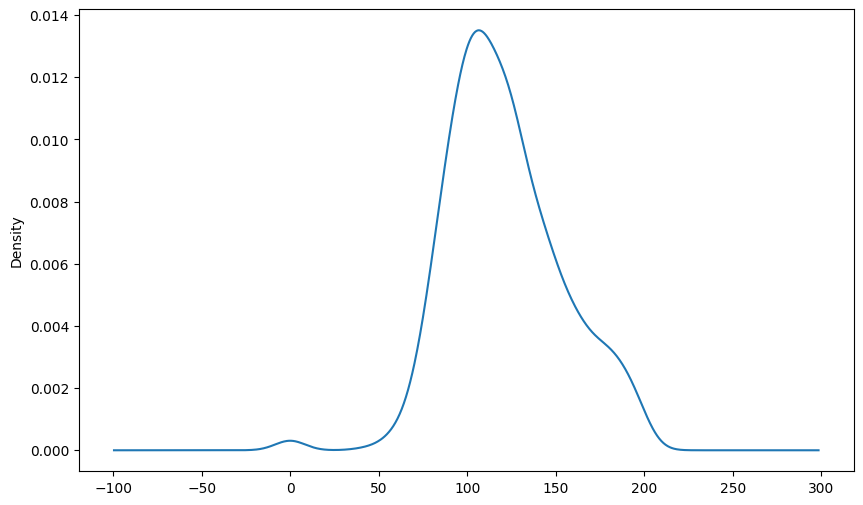

In [21]:
df['Glucose'].plot(kind='density', figsize=(10,6))

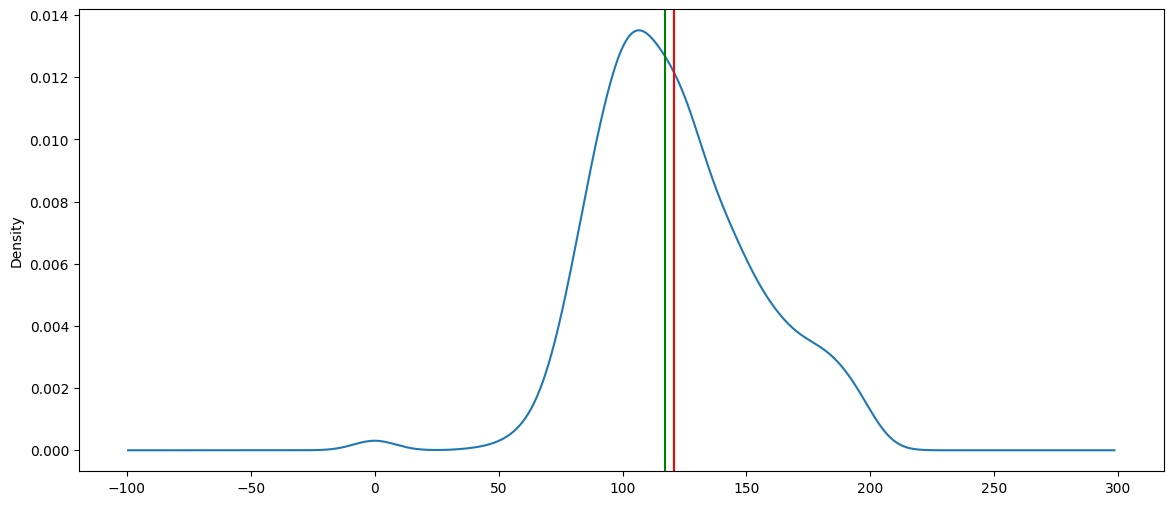

In [22]:
ax = df['Glucose'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['Glucose'].mean(), color='red')
ax.axvline(df['Glucose'].median(), color='green')

Text(0.5, 0, 'Glucose')

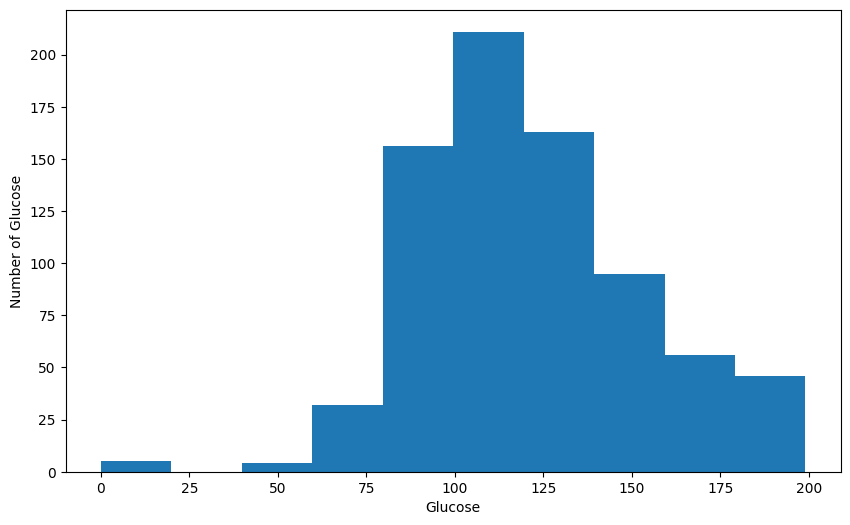

In [23]:
ax = df['Glucose'].plot(kind='hist', figsize=(10,6))
ax.set_ylabel('Number of Glucose')
ax.set_xlabel('Glucose')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `AgeCategories` column:

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategories,Exist Cases,Cases_Num
0,6,148,72,35,0,33.6,0.627,50,old,Yes,1
1,1,85,66,29,0,26.6,0.351,31,Middle Age,No,0
2,8,183,64,0,0,23.3,0.672,32,Middle Age,Yes,1
3,1,89,66,23,94,28.1,0.167,21,Adolescent,No,0
4,0,137,40,35,168,43.1,2.288,33,Middle Age,Yes,1


In [25]:
df['AgeCategories'].value_counts()

AgeCategories
Adolescent    417
Middle Age    262
old            89
Name: count, dtype: int64

<Axes: ylabel='count'>

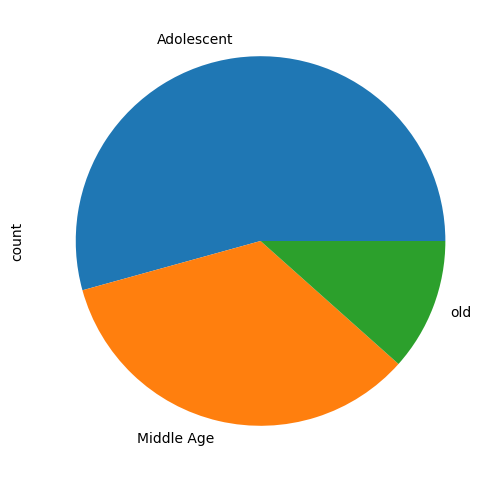

In [26]:
df['AgeCategories'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Cases')

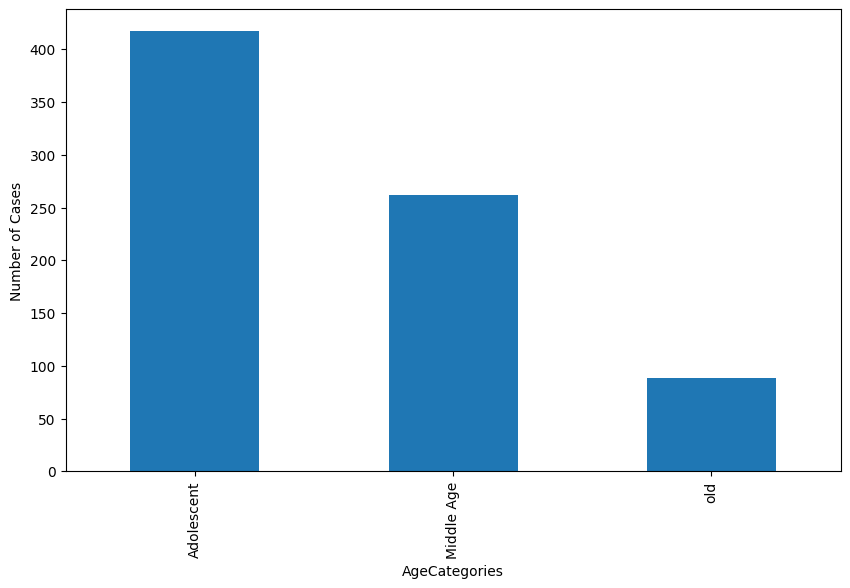

In [27]:
ax = df['AgeCategories'].value_counts().plot(kind='bar', figsize=(10,6))
ax.set_ylabel('Number of Cases')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


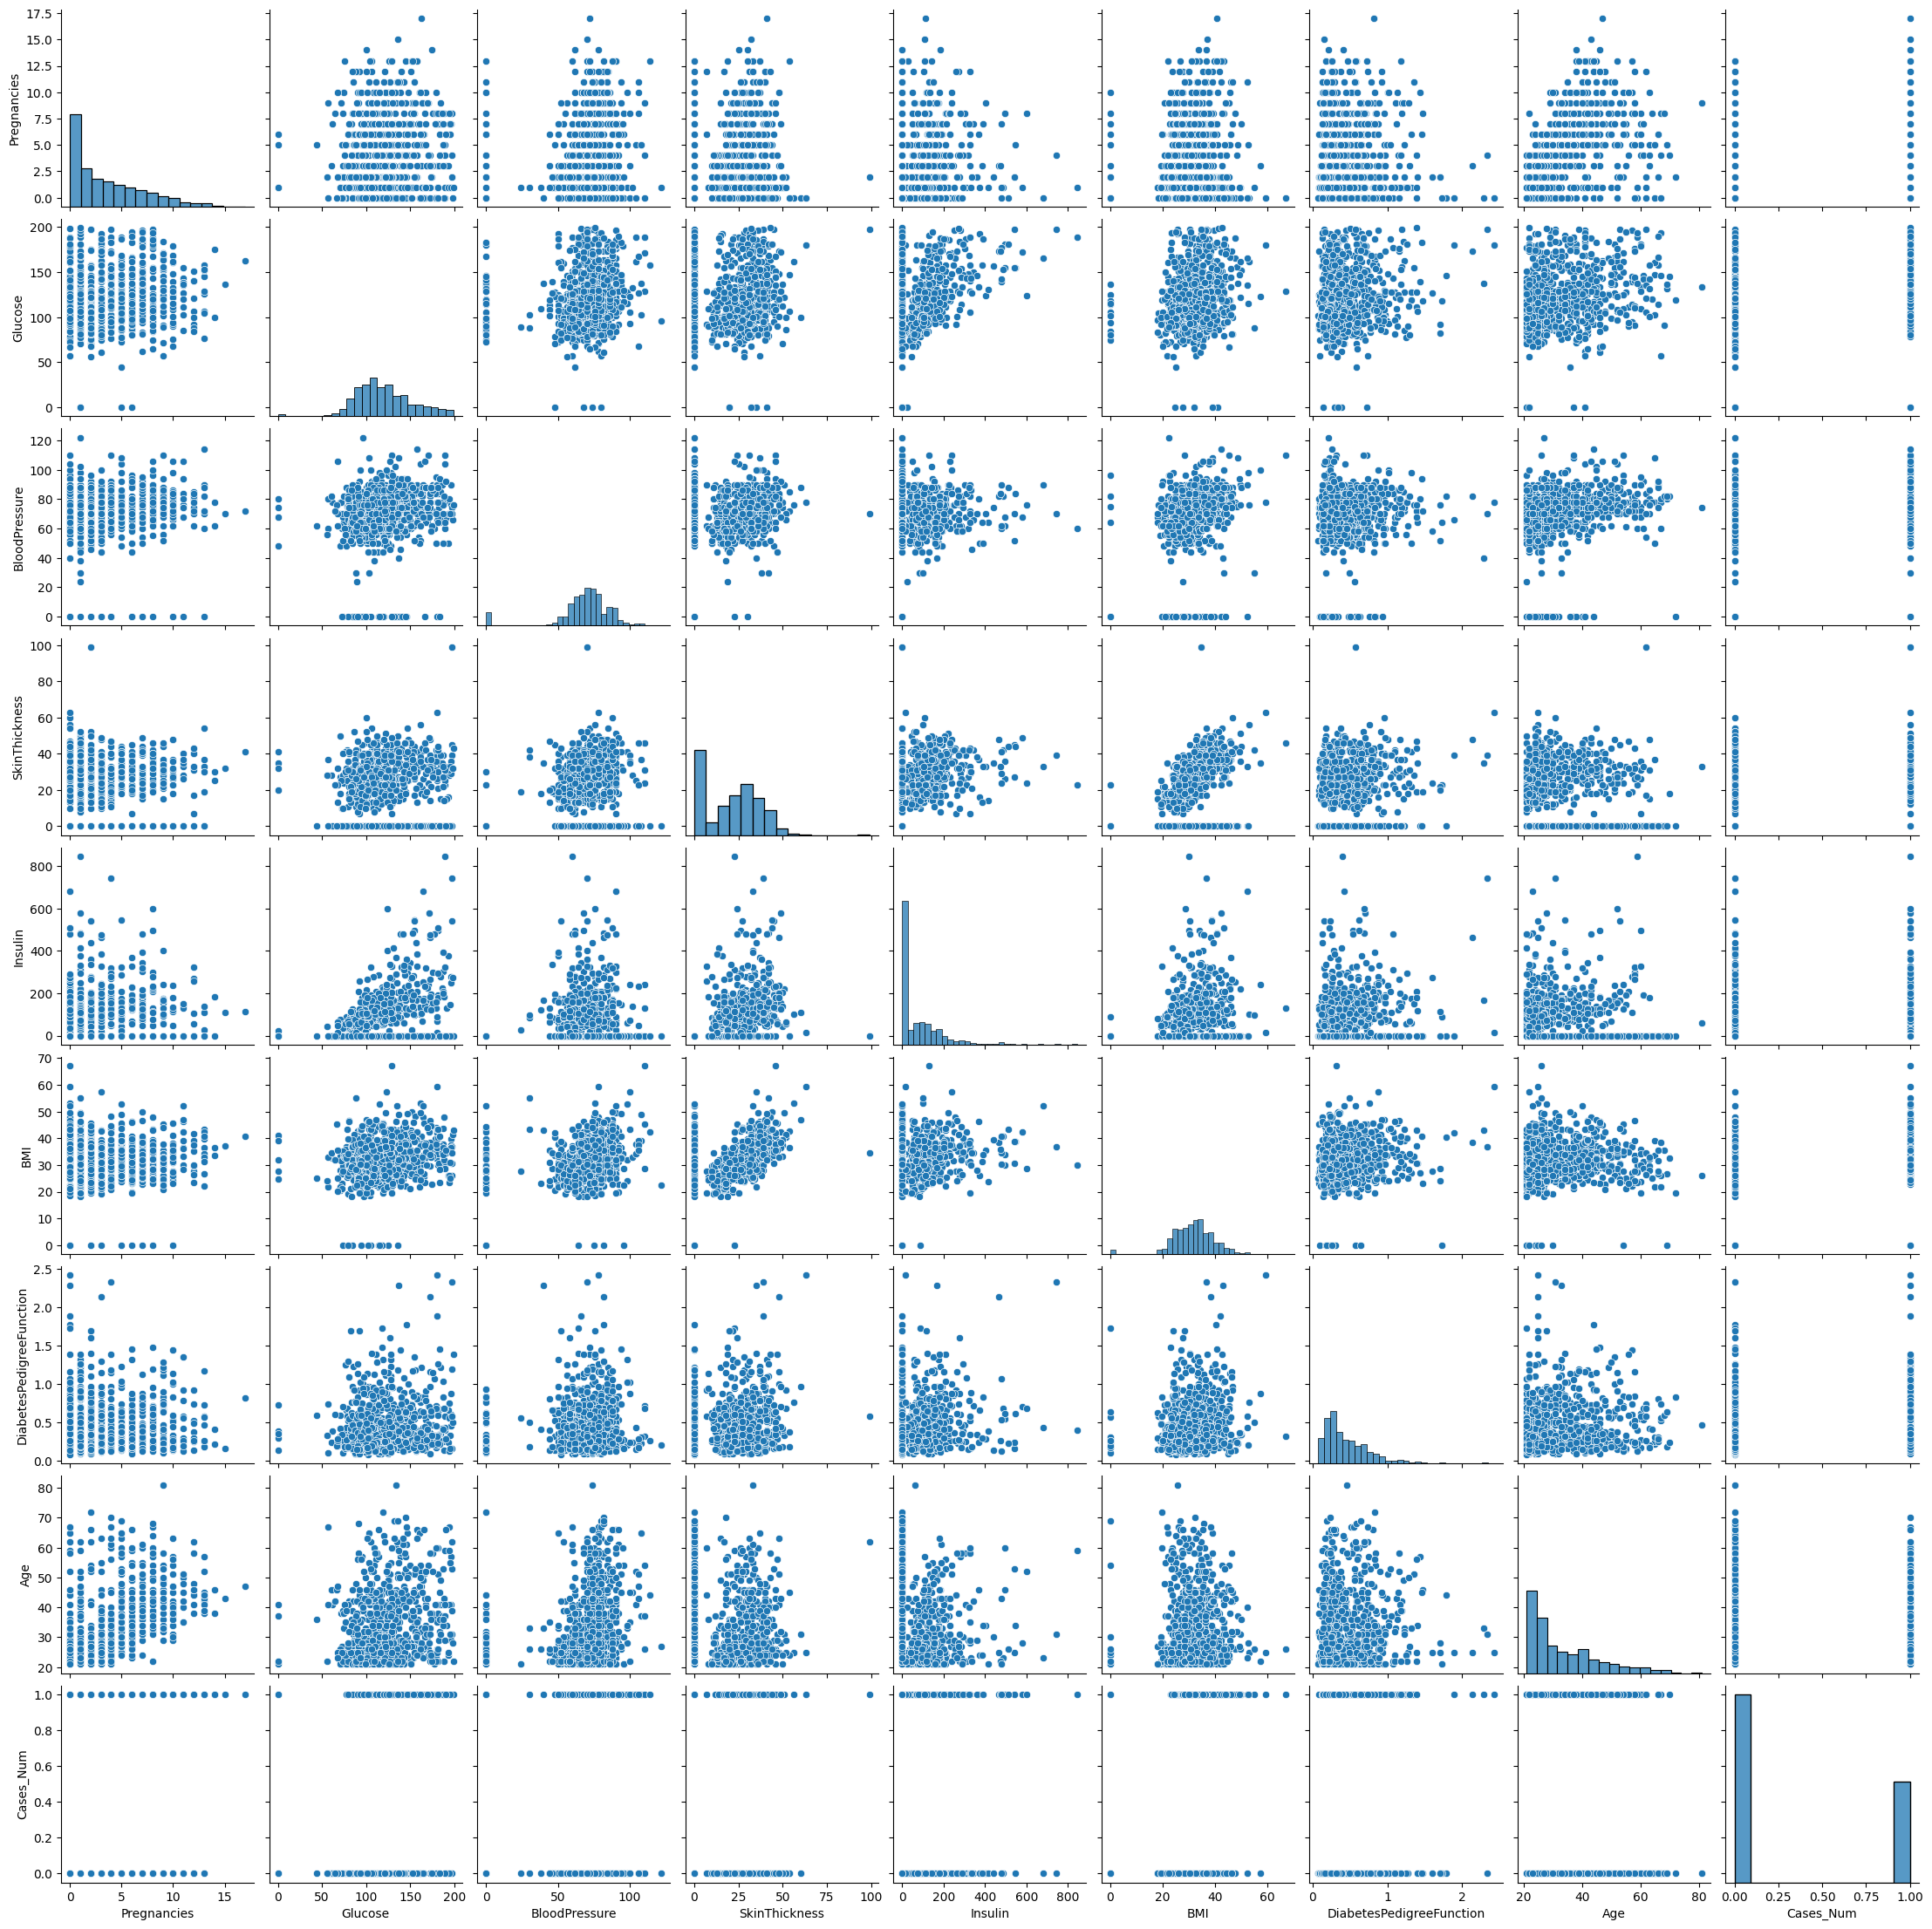

In [28]:
sns.pairplot(df)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

We will find any significant relationship

In [29]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Cases_Num']
corr=df[columns].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cases_Num
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Cases_Num,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


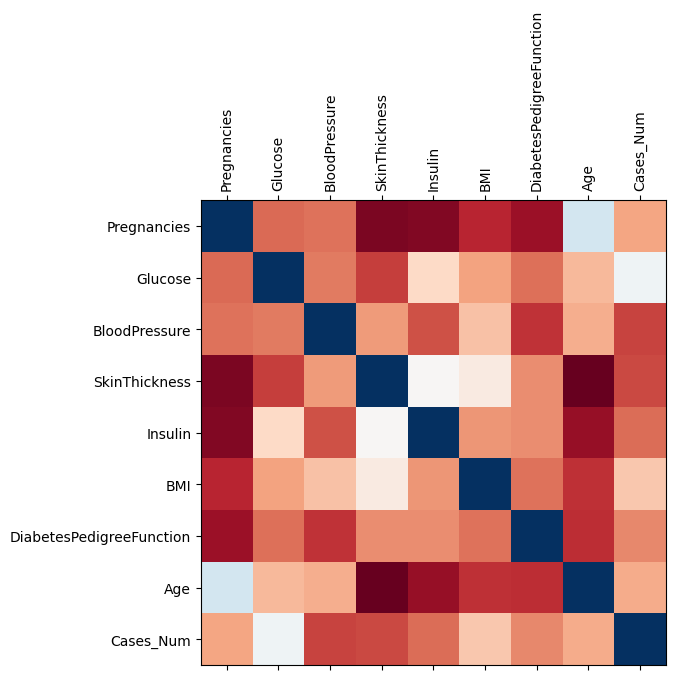

In [30]:
fig = plt.figure(figsize=(6,6))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<Axes: xlabel='Age', ylabel='Pregnancies'>

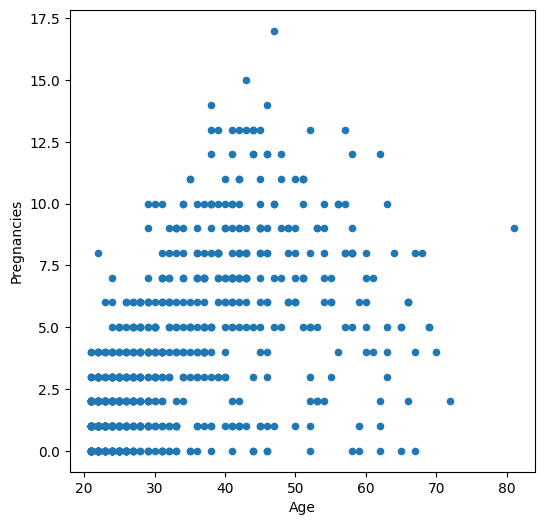

In [31]:
df.plot(kind='scatter', x='Age', y='Pregnancies', figsize=(6,6))

Text(0, 0.5, 'BloodPressure')

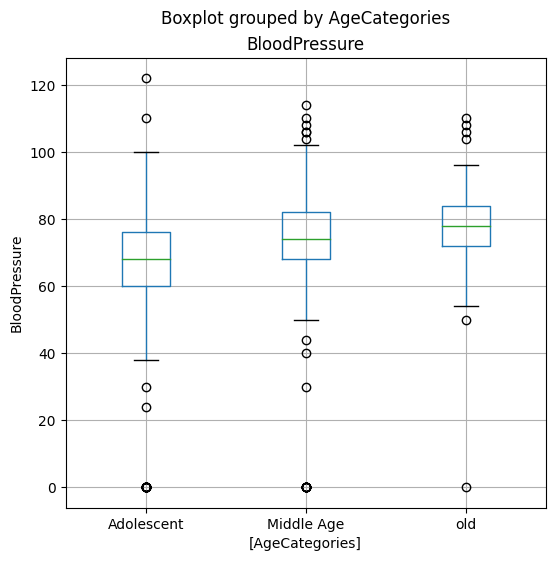

In [32]:
ax = df[['BloodPressure', 'AgeCategories']].boxplot(by='AgeCategories', figsize=(6,6))
ax.set_ylabel('BloodPressure')

Pregnancies         Axes(0.125,0.53;0.227941x0.35)
Glucose          Axes(0.398529,0.53;0.227941x0.35)
BloodPressure    Axes(0.672059,0.53;0.227941x0.35)
SkinThickness       Axes(0.125,0.11;0.227941x0.35)
Insulin          Axes(0.398529,0.11;0.227941x0.35)
BMI              Axes(0.672059,0.11;0.227941x0.35)
dtype: object

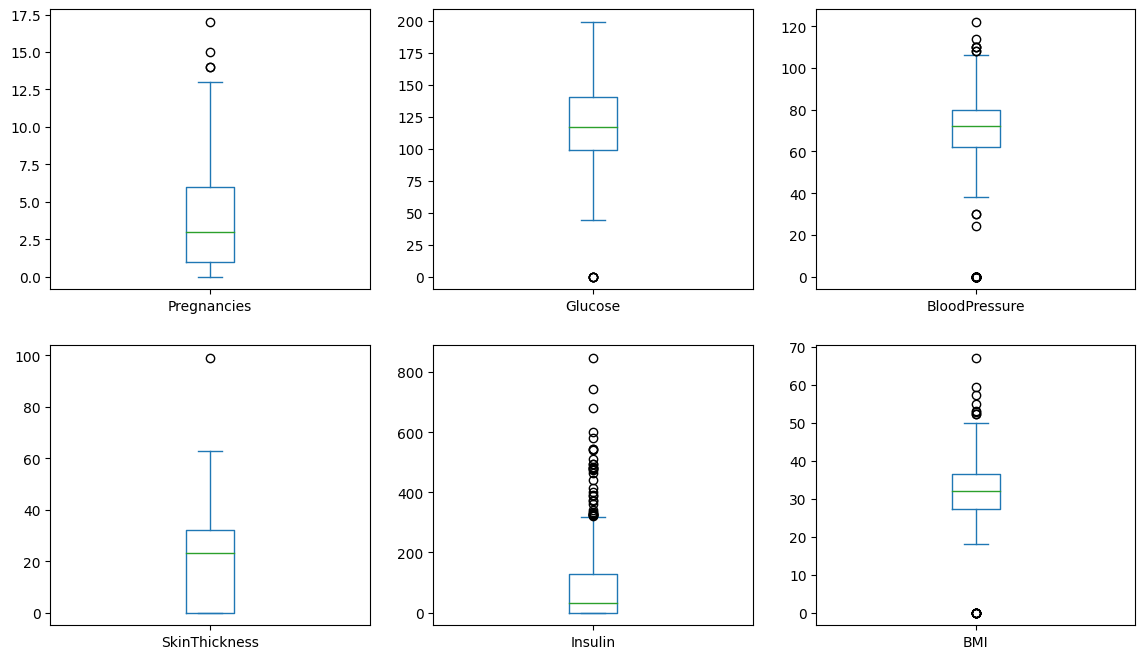

In [33]:
boxplot_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Column wrangling

### Add and calculate a new `Pregnancies_per_Age` column

In [34]:
df['Pregnancies_per_Age'] = df['Pregnancies'] / df['Age']

df['Pregnancies_per_Age'].head()

0    0.120000
1    0.032258
2    0.250000
3    0.047619
4    0.000000
Name: Pregnancies_per_Age, dtype: float64

<Axes: ylabel='Density'>

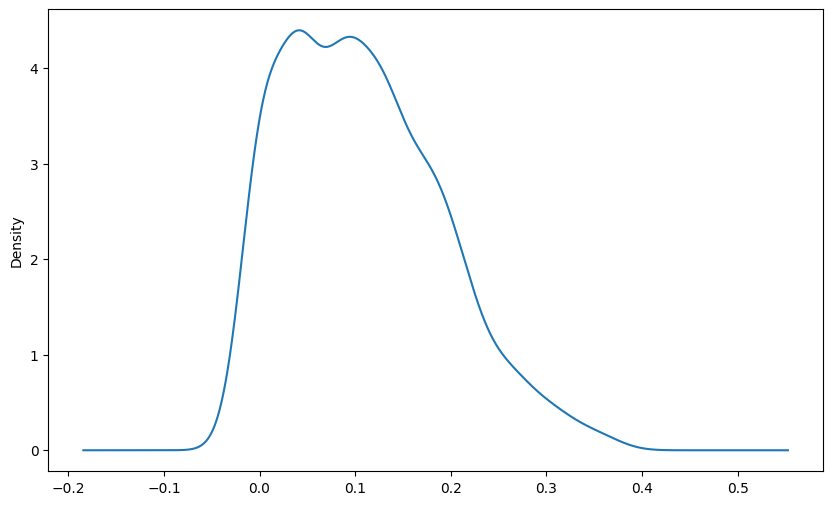

In [35]:
df['Pregnancies_per_Age'].plot(kind='density', figsize=(10,6))

<Axes: ylabel='Frequency'>

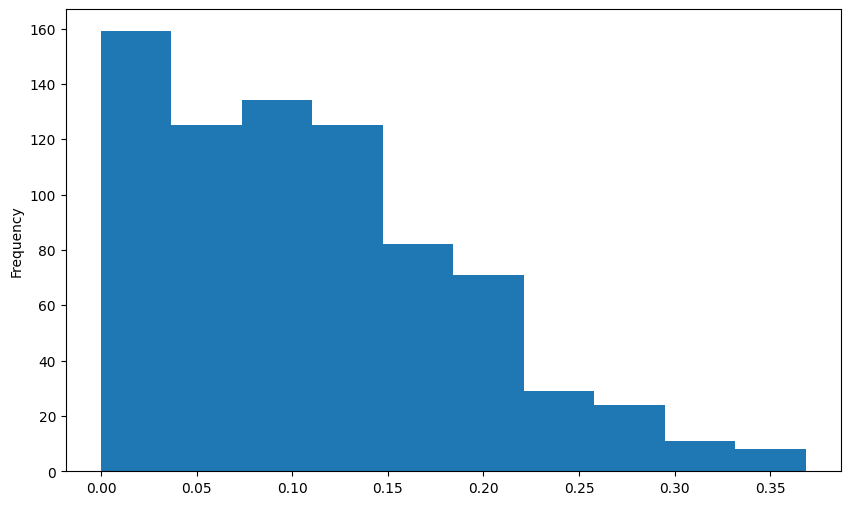

In [36]:
df['Pregnancies_per_Age'].plot(kind='hist', figsize=(10,6))

### Add and calculate a new `Calculated_Insulin` column

Use this formula

$$ Calculated_Insulin = Insulin * DiabetesPedigreeFunction $$

In [37]:
df['Calculated_Insulin'] = df['Insulin'] * df['DiabetesPedigreeFunction']

df['Calculated_Insulin'].head()

0      0.000
1      0.000
2      0.000
3     15.698
4    384.384
Name: Calculated_Insulin, dtype: float64

We can see the relationship between `Cost` and `Profit` using a scatter plot:

<Axes: xlabel='Calculated_Insulin', ylabel='BMI'>

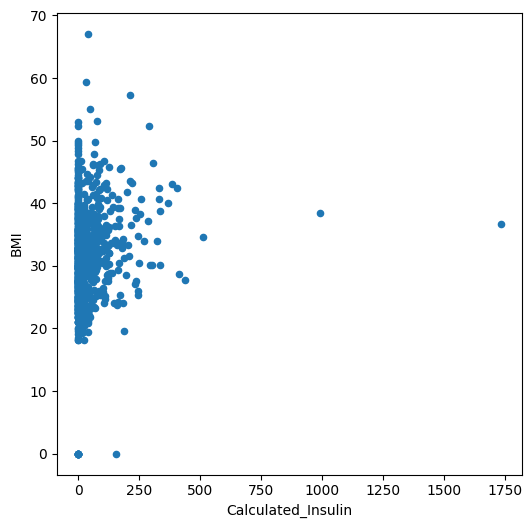

In [38]:
df.plot(kind='scatter', x='Calculated_Insulin', y='BMI', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the data which related to age category `old`

In [39]:
df.loc[df['AgeCategories'] == 'old']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeCategories,Exist Cases,Cases_Num,Pregnancies_per_Age,Calculated_Insulin
0,6,148,72,35,0,33.6,0.627,50,old,Yes,1,0.120000,0.000
8,2,197,70,45,543,30.5,0.158,53,old,Yes,1,0.037736,85.794
9,8,125,96,0,0,0.0,0.232,54,old,Yes,1,0.148148,0.000
12,10,139,80,0,0,27.1,1.441,57,old,No,0,0.175439,0.000
13,1,189,60,23,846,30.1,0.398,59,old,Yes,1,0.016949,336.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2,105,75,0,0,23.3,0.560,53,old,No,0,0.037736,0.000
749,6,162,62,0,0,24.3,0.178,50,old,Yes,1,0.120000,0.000
757,0,123,72,0,0,36.3,0.258,52,old,Yes,1,0.000000,0.000
759,6,190,92,0,0,35.5,0.278,66,old,Yes,1,0.090909,0.000


### Get the mean SkinThickness of the `Middle 1age (31-49)`

In [40]:
df.loc[df['AgeCategories'] == 'Middle Age', 'SkinThickness'].mean()

20.18320610687023

### How many records belong to Age Group `Adolescent (<31)` or `Middle Age (31-49)`?

In [41]:
df.loc[(df['AgeCategories'] == 'Adolescent') | (df['AgeCategories'] == 'Middle Age')].shape[0]

679

### Get the mean BMI for  `Adolescent (<31)` which is injured in diabete `Exist Cases = yes`

In [42]:
df.loc[(df['AgeCategories'] == 'Adolescent') & (df['Exist Cases'] == 'Yes'), 'BMI'].mean()

36.455555555555556

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
